In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip -q val2014.zip -d /content/

--2025-06-24 02:51:40--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.217.153, 52.216.77.244, 54.231.198.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.217.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  74.9MB/s    in 82s     

2025-06-24 02:53:02 (77.1 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!mkdir -p /content/val2014_sample

!ls /content/val2014 | head -50 | xargs -I {} cp /content/val2014/{} /content/val2014_sample/

In [ ]:
!zip -q -r val2014_sample.zip /content/val2014_sample/

# **Topik Unsupervised Learning (K-Means + PCA)**

=== STARTING UNSUPERVISED LEARNING ANALYSIS ===

🎯 Target: Analyze 50 images from COCO val2014 dataset
📊 Algorithms: K-Means Clustering + PCA
🔍 Features: Color Histograms, Texture, Shape, Color Moments

📁 Loading images...
Loading images...
Loaded 50 images
✅ Successfully loaded 50 images

🔧 Extracting features...
Extracting features...
Extracted features shape: (50, 106)
✅ Extracted 106 features from 50 images

📈 Performing PCA Analysis...
Performing PCA with 2 components...
Explained variance ratio: [0.21804447 0.15356003]
Total explained variance: 0.372


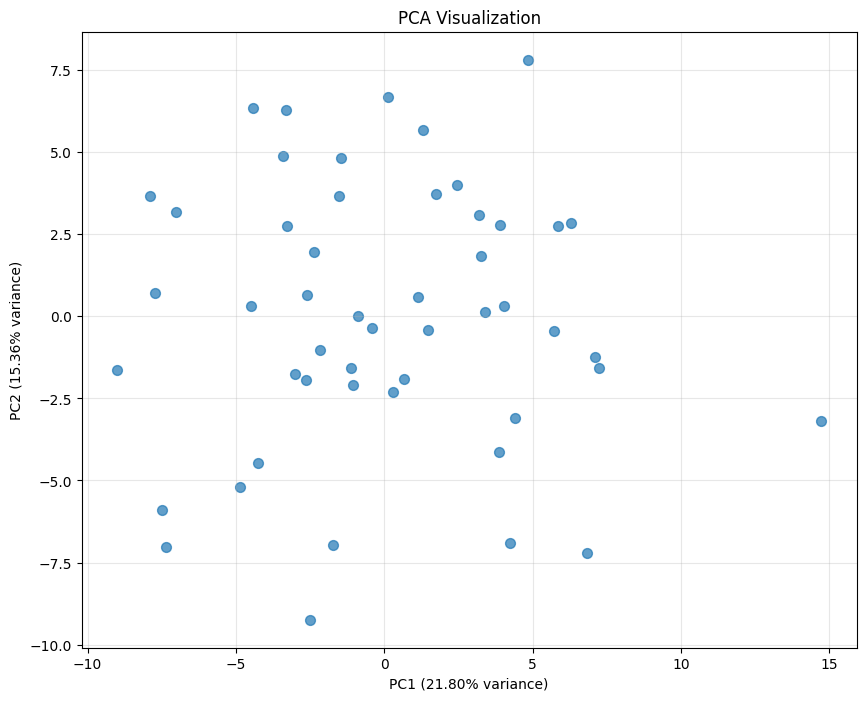

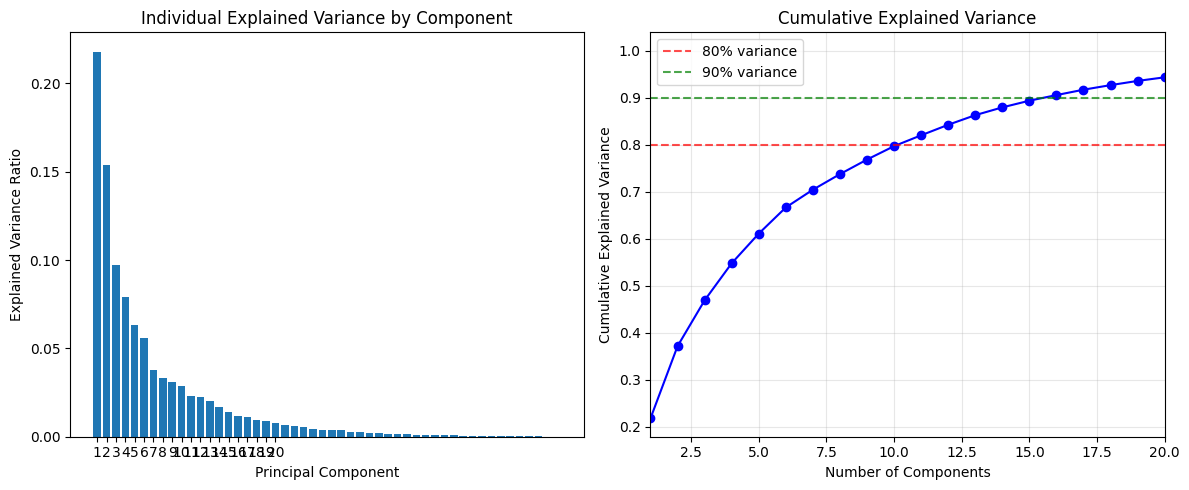

Components needed for 80% variance: 11
Components needed for 90% variance: 16
✅ PCA completed. 2 components explain 37.2% of variance

🎯 Performing K-Means Clustering...
Finding optimal number of clusters...


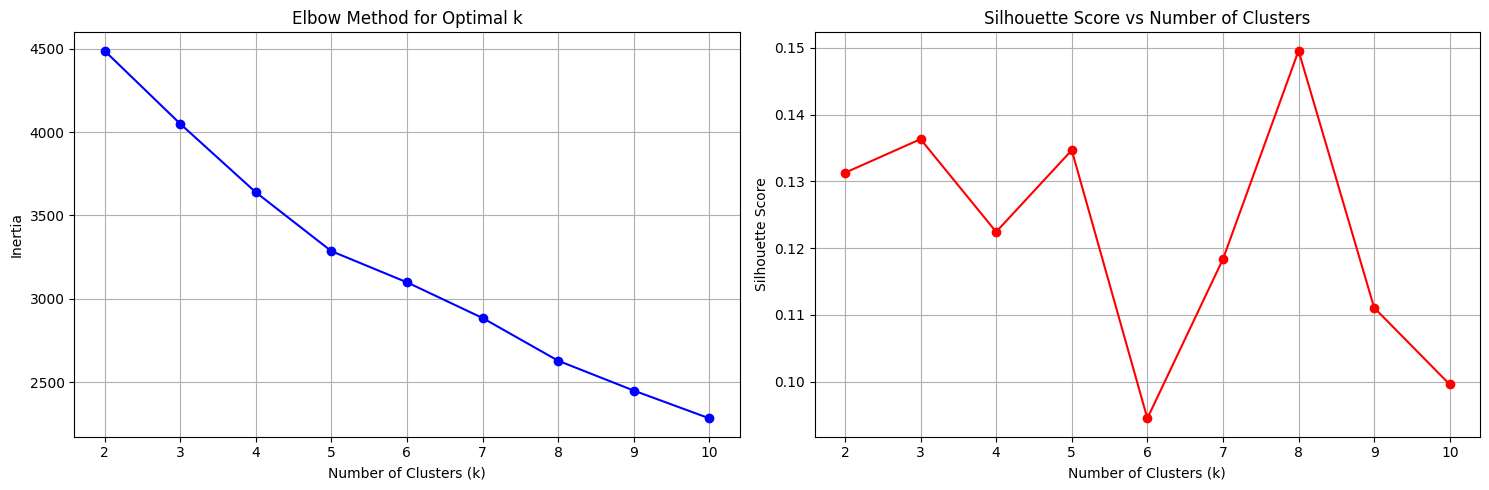

Optimal number of clusters: 8
Best silhouette score: 0.150
Performing K-Means clustering with 8 clusters...
Silhouette Score: 0.150


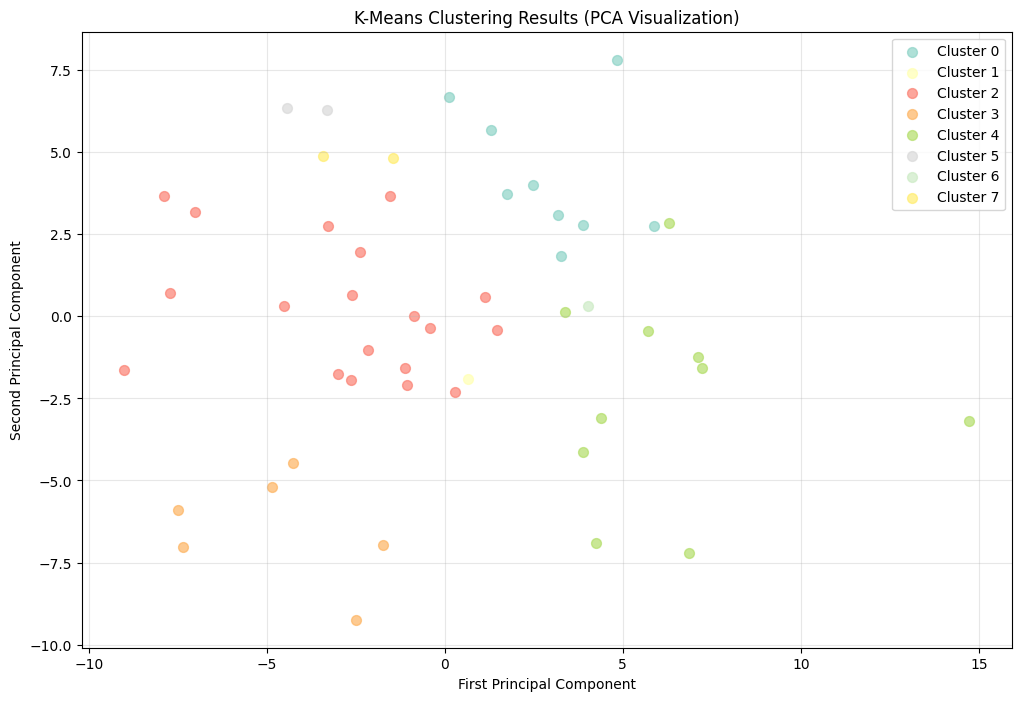

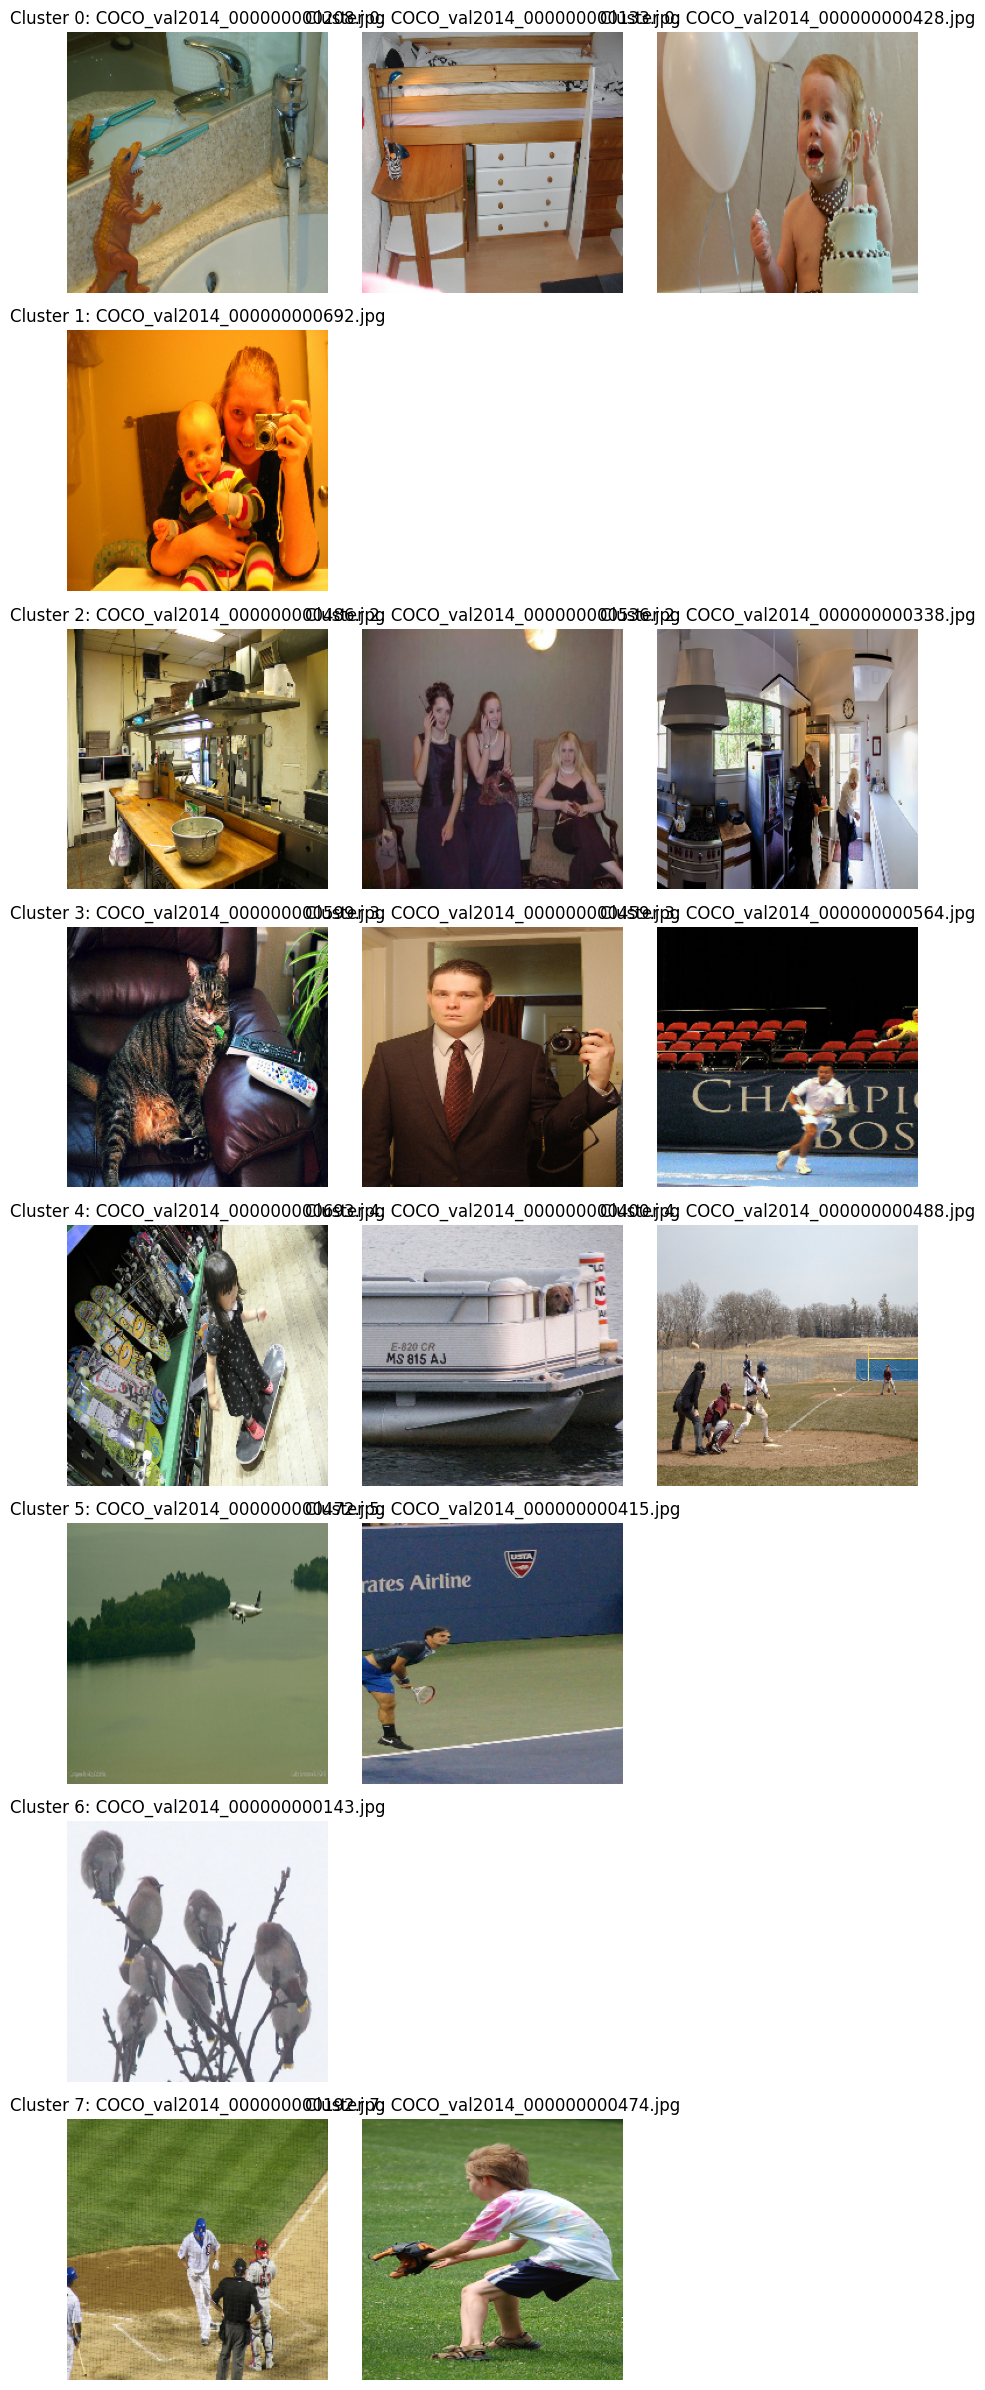

✅ Clustering completed. Found 8 clusters (Silhouette Score: 0.150)

🎨 Creating comprehensive visualizations...


/tmp/ipython-input-4-1901618477.py:479: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


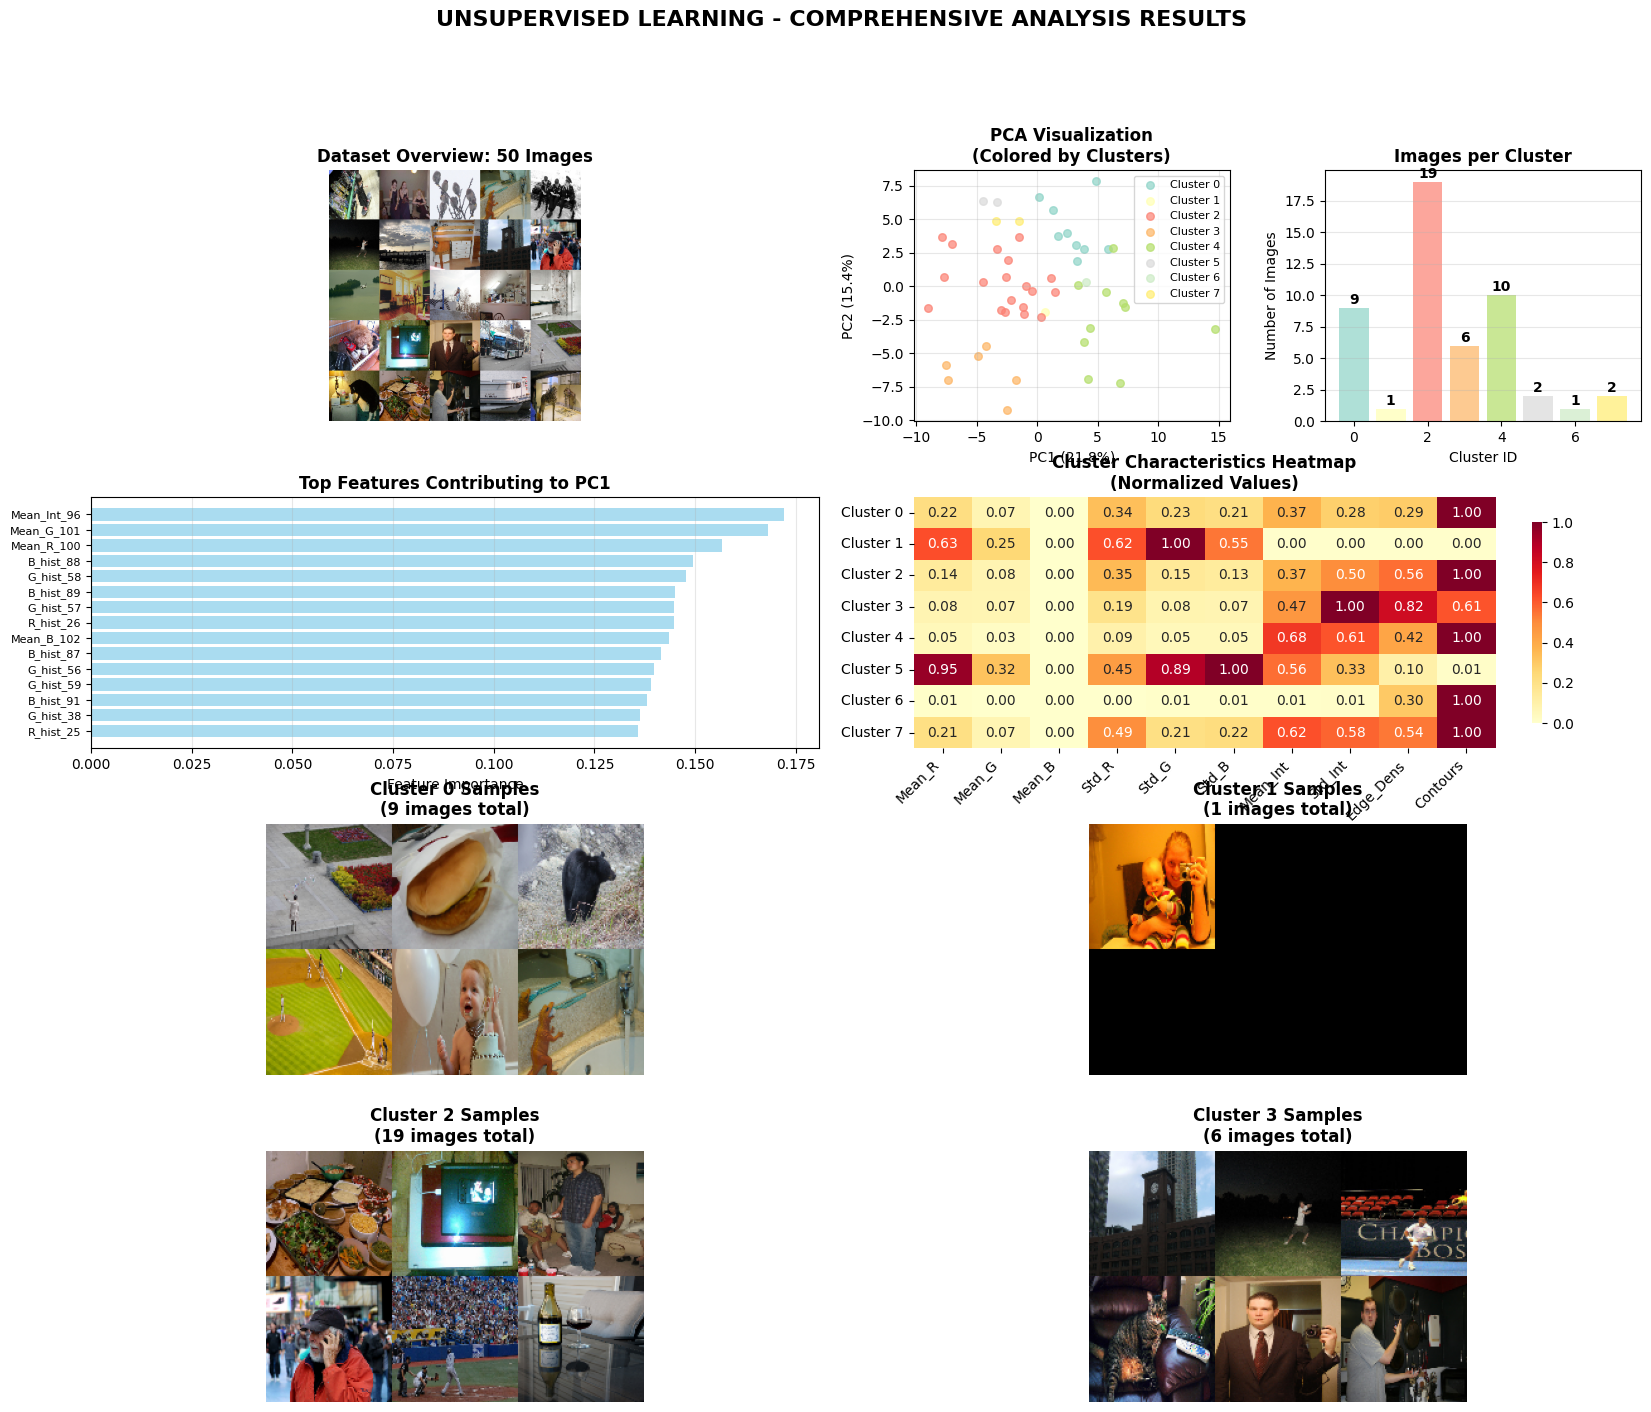


🔎 Comparing algorithm performance...

=== ALGORITHM COMPARISON: K-MEANS vs PCA ===


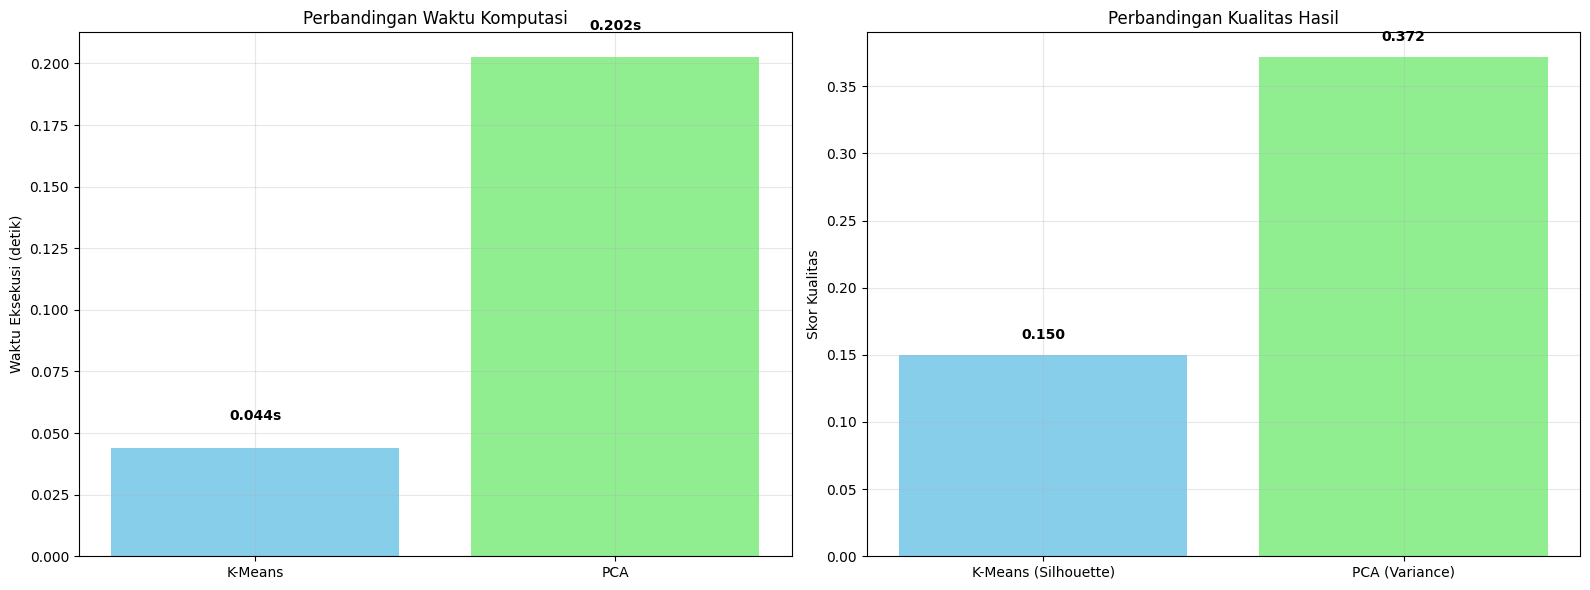


🔍 INTERPRETATION:
1. Tujuan Algoritma:
   - K-Means: Clustering (mengelompokkan data yang serupa)
   - PCA: Dimensionality reduction (mengekstrak fitur penting)

2. Hasil Perbandingan:
   - K-Means butuh 0.044 detik, Silhouette Score: 0.150
   - PCA butuh 0.202 detik, Explained Variance: 0.372

3. Rekomendasi:
   ❌ Kedua algoritma kesulitan menemukan pola yang jelas
   - Pertimbangkan untuk:
     * Meningkatkan kualitas/extract fitur
     * Mencoba algoritma lain seperti DBSCAN atau t-SNE
     * Mengevaluasi kualitas dataset
📋 Analyzing cluster characteristics...
=== CLUSTER ANALYSIS ===

Cluster 0 (9 images):
  - Average red intensity: 132.75
  - Average green intensity: 45.78
  - Average blue intensity: 0.15
  - Average edge density: 180.3333
  - Average number of contours: 616.33
  - Images: ['COCO_val2014_000000000208.jpg', 'COCO_val2014_000000000133.jpg', 'COCO_val2014_000000000164.jpg', 'COCO_val2014_000000000641.jpg', 'COCO_val2014_000000000569.jpg']...

Cluster 1 (1 images):
 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from pathlib import Path
import zipfile

class UnsupervisedImageAnalyzer:
    def __init__(self, image_folder_path):
        self.image_folder_path = image_folder_path
        self.images = []
        self.image_names = []
        self.features = None
        self.scaled_features = None

    def load_images(self, max_images=50):
        """Load dan preprocess gambar dari folder"""
        print("Loading images...")

        # Extract zip jika diperlukan
        if not os.path.exists(self.image_folder_path):
            zip_path = self.image_folder_path + '.zip'
            if os.path.exists(zip_path):
                print(f"Extracting {zip_path}...")
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(os.path.dirname(zip_path))

        # Load gambar
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
        image_files = []

        for ext in image_extensions:
            image_files.extend(Path(self.image_folder_path).glob(f'*{ext}'))
            image_files.extend(Path(self.image_folder_path).glob(f'*{ext.upper()}'))

        # Batasi jumlah gambar
        image_files = list(image_files)[:max_images]

        for img_path in image_files:
            try:
                # Load gambar
                img = cv2.imread(str(img_path))
                if img is not None:
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Resize untuk konsistensi
                    img = cv2.resize(img, (224, 224))
                    self.images.append(img)
                    self.image_names.append(img_path.name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

        print(f"Loaded {len(self.images)} images")
        return len(self.images)

    def extract_features(self):
        """Extract fitur dari gambar untuk unsupervised learning"""
        print("Extracting features...")
        features_list = []

        for img in self.images:
            # 1. Color Histogram Features
            hist_r = cv2.calcHist([img], [0], None, [32], [0, 256])
            hist_g = cv2.calcHist([img], [1], None, [32], [0, 256])
            hist_b = cv2.calcHist([img], [2], None, [32], [0, 256])

            # 2. Texture Features (LBP-like)
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

            # Mean dan std dari intensitas
            mean_intensity = np.mean(gray)
            std_intensity = np.std(gray)

            # Edge density
            edges = cv2.Canny(gray, 50, 150)
            edge_density = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])

            # 3. Shape Features
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            num_contours = len(contours)

            # 4. Color Moments
            mean_r, mean_g, mean_b = np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2])
            std_r, std_g, std_b = np.std(img[:,:,0]), np.std(img[:,:,1]), np.std(img[:,:,2])

            # Gabungkan semua fitur
            feature_vector = np.concatenate([
                hist_r.flatten(), hist_g.flatten(), hist_b.flatten(),  # 96 features
                [mean_intensity, std_intensity, edge_density, num_contours],  # 4 features
                [mean_r, mean_g, mean_b, std_r, std_g, std_b]  # 6 features
            ])

            features_list.append(feature_vector)

        self.features = np.array(features_list)

        # Standardize features
        scaler = StandardScaler()
        self.scaled_features = scaler.fit_transform(self.features)

        print(f"Extracted features shape: {self.features.shape}")
        return self.features.shape

    def find_optimal_clusters(self, max_clusters=10):
        """Mencari jumlah cluster optimal menggunakan Elbow Method dan Silhouette Score"""
        print("Finding optimal number of clusters...")

        inertias = []
        silhouette_scores = []
        K_range = range(2, min(max_clusters + 1, len(self.images)))

        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(self.scaled_features)

            inertias.append(kmeans.inertia_)
            sil_score = silhouette_score(self.scaled_features, cluster_labels)
            silhouette_scores.append(sil_score)

        # Plot Elbow Method dan Silhouette Score
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Elbow Method
        ax1.plot(K_range, inertias, 'bo-')
        ax1.set_xlabel('Number of Clusters (k)')
        ax1.set_ylabel('Inertia')
        ax1.set_title('Elbow Method for Optimal k')
        ax1.grid(True)

        # Silhouette Score
        ax2.plot(K_range, silhouette_scores, 'ro-')
        ax2.set_xlabel('Number of Clusters (k)')
        ax2.set_ylabel('Silhouette Score')
        ax2.set_title('Silhouette Score vs Number of Clusters')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

        # Pilih k optimal berdasarkan silhouette score tertinggi
        optimal_k = K_range[np.argmax(silhouette_scores)]
        print(f"Optimal number of clusters: {optimal_k}")
        print(f"Best silhouette score: {max(silhouette_scores):.3f}")

        return optimal_k, silhouette_scores

    def perform_kmeans_clustering(self, n_clusters=None):
        """Perform K-Means clustering"""
        if n_clusters is None:
            n_clusters, _ = self.find_optimal_clusters()

        print(f"Performing K-Means clustering with {n_clusters} clusters...")

        # K-Means clustering
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.cluster_labels = self.kmeans.fit_predict(self.scaled_features)

        # Evaluasi clustering
        sil_score = silhouette_score(self.scaled_features, self.cluster_labels)
        print(f"Silhouette Score: {sil_score:.3f}")

        # Visualisasi hasil clustering
        self.visualize_clusters()

        return self.cluster_labels, sil_score

    def perform_pca_analysis(self, n_components=2):
        """Perform PCA untuk dimensionality reduction dan visualisasi"""
        print(f"Performing PCA with {n_components} components...")

        # PCA
        self.pca = PCA(n_components=min(n_components, self.scaled_features.shape[1]))
        self.pca_features = self.pca.fit_transform(self.scaled_features)

        # Explained variance
        explained_variance = self.pca.explained_variance_ratio_
        print(f"Explained variance ratio: {explained_variance}")
        print(f"Total explained variance: {np.sum(explained_variance):.3f}")

        # Visualisasi PCA
        self.visualize_pca()

        # PCA dengan lebih banyak komponen untuk analisis
        if self.scaled_features.shape[1] > 10:
            pca_full = PCA()
            pca_full.fit(self.scaled_features)
            self.plot_explained_variance(pca_full)

        return self.pca_features, explained_variance

    def visualize_clusters(self):
        """Visualisasi hasil clustering"""
        if not hasattr(self, 'cluster_labels'):
            print("Please run K-Means clustering first!")
            return

        n_clusters = len(np.unique(self.cluster_labels))

        # Jika belum ada PCA, lakukan PCA untuk visualisasi
        if not hasattr(self, 'pca_features'):
            pca_viz = PCA(n_components=2)
            pca_features_viz = pca_viz.fit_transform(self.scaled_features)
        else:
            pca_features_viz = self.pca_features[:, :2]  # Ambil 2 komponen pertama

        # Plot clusters dalam 2D PCA space
        plt.figure(figsize=(12, 8))
        colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))

        for i in range(n_clusters):
            mask = self.cluster_labels == i
            plt.scatter(pca_features_viz[mask, 0], pca_features_viz[mask, 1],
                       c=[colors[i]], label=f'Cluster {i}', s=50, alpha=0.7)

        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('K-Means Clustering Results (PCA Visualization)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        # Tampilkan sample gambar dari setiap cluster
        self.show_cluster_samples()

    def show_cluster_samples(self, samples_per_cluster=3):
        """Tampilkan sample gambar dari setiap cluster"""
        if not hasattr(self, 'cluster_labels'):
            print("Please run K-Means clustering first!")
            return

        n_clusters = len(np.unique(self.cluster_labels))

        fig, axes = plt.subplots(n_clusters, samples_per_cluster,
                                figsize=(samples_per_cluster * 3, n_clusters * 3))

        if n_clusters == 1:
            axes = axes.reshape(1, -1)
        elif samples_per_cluster == 1:
            axes = axes.reshape(-1, 1)

        for cluster_id in range(n_clusters):
            cluster_indices = np.where(self.cluster_labels == cluster_id)[0]
            selected_indices = np.random.choice(cluster_indices,
                                              min(samples_per_cluster, len(cluster_indices)),
                                              replace=False)

            for j, idx in enumerate(selected_indices):
                axes[cluster_id, j].imshow(self.images[idx])
                axes[cluster_id, j].set_title(f'Cluster {cluster_id}: {self.image_names[idx]}')
                axes[cluster_id, j].axis('off')

            # Kosongkan subplot yang tidak digunakan
            for j in range(len(selected_indices), samples_per_cluster):
                axes[cluster_id, j].axis('off')

        plt.tight_layout()
        plt.show()

    def visualize_pca(self):
        """Visualisasi hasil PCA"""
        if not hasattr(self, 'pca_features'):
            print("Please run PCA first!")
            return

        # Plot 2D PCA
        plt.figure(figsize=(10, 8))

        # Jika sudah ada cluster labels, gunakan untuk pewarnaan
        if hasattr(self, 'cluster_labels'):
            colors = plt.cm.Set3(self.cluster_labels / max(self.cluster_labels))
            scatter = plt.scatter(self.pca_features[:, 0], self.pca_features[:, 1],
                                c=colors, s=50, alpha=0.7)
            plt.title('PCA Visualization (Colored by K-Means Clusters)')
        else:
            plt.scatter(self.pca_features[:, 0], self.pca_features[:, 1],
                       s=50, alpha=0.7)
            plt.title('PCA Visualization')

        plt.xlabel(f'PC1 ({self.pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'PC2 ({self.pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_explained_variance(self, pca_full):
        """Plot explained variance untuk menentukan jumlah komponen optimal"""
        explained_variance = pca_full.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance)

        plt.figure(figsize=(12, 5))

        # Individual explained variance
        plt.subplot(1, 2, 1)
        plt.bar(range(1, len(explained_variance) + 1), explained_variance)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Individual Explained Variance by Component')
        plt.xticks(range(1, min(21, len(explained_variance) + 1)))

        # Cumulative explained variance
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
        plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% variance')
        plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.7, label='90% variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Cumulative Explained Variance')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(1, min(20, len(cumulative_variance)))

        plt.tight_layout()
        plt.show()

        # Berapa komponen untuk 80% dan 90% variance
        components_80 = np.argmax(cumulative_variance >= 0.8) + 1
        components_90 = np.argmax(cumulative_variance >= 0.9) + 1
        print(f"Components needed for 80% variance: {components_80}")
        print(f"Components needed for 90% variance: {components_90}")

    def analyze_cluster_characteristics(self):
        """Analisis karakteristik setiap cluster"""
        if not hasattr(self, 'cluster_labels'):
            print("Please run K-Means clustering first!")
            return

        n_clusters = len(np.unique(self.cluster_labels))

        print("=== CLUSTER ANALYSIS ===")
        for cluster_id in range(n_clusters):
            cluster_mask = self.cluster_labels == cluster_id
            cluster_features = self.features[cluster_mask]

            print(f"\nCluster {cluster_id} ({np.sum(cluster_mask)} images):")
            print(f"  - Average red intensity: {np.mean(cluster_features[:, 96]):.2f}")
            print(f"  - Average green intensity: {np.mean(cluster_features[:, 97]):.2f}")
            print(f"  - Average blue intensity: {np.mean(cluster_features[:, 98]):.2f}")
            print(f"  - Average edge density: {np.mean(cluster_features[:, 94]):.4f}")
            print(f"  - Average number of contours: {np.mean(cluster_features[:, 95]):.2f}")

            # Daftar gambar dalam cluster
            cluster_images = [self.image_names[i] for i in range(len(self.image_names)) if cluster_mask[i]]
            print(f"  - Images: {cluster_images[:5]}{'...' if len(cluster_images) > 5 else ''}")

    def compare_algorithms(self):
      """Bandingkan performa K-Means dan PCA dalam menganalisis data gambar"""
      print("\n=== ALGORITHM COMPARISON: K-MEANS vs PCA ===")

      # Persiapan data
      X = self.scaled_features
      n_samples = X.shape[0]

      # 1. Hitung waktu komputasi
      import time

      # K-Means
      start_time = time.time()
      kmeans = KMeans(n_clusters=len(np.unique(self.cluster_labels)), random_state=42, n_init=10)
      kmeans.fit(X)
      kmeans_time = time.time() - start_time

      # PCA
      start_time = time.time()
      pca = PCA(n_components=2)
      pca.fit(X)
      pca_time = time.time() - start_time

      # 2. Evaluasi kualitas
      # Untuk K-Means kita gunakan silhouette score
      kmeans_score = silhouette_score(X, kmeans.labels_)

      # Untuk PCA kita hitung variance yang dijelaskan
      pca_score = np.sum(pca.explained_variance_ratio_)

      # 3. Visualisasi perbandingan
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

      # Plot waktu komputasi
      ax1.bar(['K-Means', 'PCA'], [kmeans_time, pca_time], color=['skyblue', 'lightgreen'])
      ax1.set_ylabel('Waktu Eksekusi (detik)')
      ax1.set_title('Perbandingan Waktu Komputasi')
      ax1.grid(True, alpha=0.3)

      # Tambahkan nilai di atas bar
      for i, v in enumerate([kmeans_time, pca_time]):
          ax1.text(i, v + 0.01, f"{v:.3f}s", ha='center', va='bottom', fontweight='bold')

      # Plot kualitas hasil
      ax2.bar(['K-Means (Silhouette)', 'PCA (Variance)'],
              [kmeans_score, pca_score],
              color=['skyblue', 'lightgreen'])
      ax2.set_ylabel('Skor Kualitas')
      ax2.set_title('Perbandingan Kualitas Hasil')
      ax2.grid(True, alpha=0.3)

      # Tambahkan nilai di atas bar
      for i, v in enumerate([kmeans_score, pca_score]):
          ax2.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontweight='bold')

      plt.tight_layout()
      plt.show()

      # 4. Interpretasi hasil
      print("\n🔍 INTERPRETATION:")
      print("1. Tujuan Algoritma:")
      print("   - K-Means: Clustering (mengelompokkan data yang serupa)")
      print("   - PCA: Dimensionality reduction (mengekstrak fitur penting)")

      print("\n2. Hasil Perbandingan:")
      print(f"   - K-Means butuh {kmeans_time:.3f} detik, Silhouette Score: {kmeans_score:.3f}")
      print(f"   - PCA butuh {pca_time:.3f} detik, Explained Variance: {pca_score:.3f}")

      print("\n3. Rekomendasi:")
      if kmeans_score > 0.5 and pca_score > 0.7:
          print("   ✅ KEDUA algoritma bekerja sangat baik untuk dataset ini")
          print("   - Gunakan K-Means untuk clustering")
          print("   - Gunakan PCA untuk visualisasi dan reduksi dimensi")
      elif kmeans_score > 0.3:
          print("   ⚠️  K-Means menunjukkan hasil yang cukup baik, PCA membantu visualisasi")
          print("   - Pertimbangkan untuk menyesuaikan jumlah cluster di K-Means")
          print("   - PCA tetap berguna untuk memahami struktur data")
      else:
          print("   ❌ Kedua algoritma kesulitan menemukan pola yang jelas")
          print("   - Pertimbangkan untuk:")
          print("     * Meningkatkan kualitas/extract fitur")
          print("     * Mencoba algoritma lain seperti DBSCAN atau t-SNE")
          print("     * Mengevaluasi kualitas dataset")

      return {
          'kmeans_time': kmeans_time,
          'pca_time': pca_time,
          'kmeans_score': kmeans_score,
          'pca_score': pca_score
      }

    def create_comprehensive_visualization(self):
        """Membuat visualisasi komprehensif semua hasil analisis"""
        if not hasattr(self, 'cluster_labels') or not hasattr(self, 'pca_features'):
            print("Please run complete analysis first!")
            return

        # Setup figure dengan multiple subplots
        fig = plt.figure(figsize=(20, 16))
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

        # 1. Dataset Overview - Tampilkan grid 50 gambar
        ax1 = fig.add_subplot(gs[0, :2])
        self.show_dataset_grid(ax1)

        # 2. PCA Scatter Plot
        ax2 = fig.add_subplot(gs[0, 2])
        self.plot_pca_scatter(ax2)

        # 3. Cluster Distribution
        ax3 = fig.add_subplot(gs[0, 3])
        self.plot_cluster_distribution(ax3)

        # 4. Feature Importance (PCA Components)
        ax4 = fig.add_subplot(gs[1, :2])
        self.plot_feature_importance(ax4)

        # 5. Cluster Characteristics Heatmap
        ax5 = fig.add_subplot(gs[1, 2:])
        self.plot_cluster_heatmap(ax5)

        # 6-9. Sample images from each cluster (4 clusters max)
        n_clusters = min(4, len(np.unique(self.cluster_labels)))
        for i in range(n_clusters):
            ax = fig.add_subplot(gs[2 + i//2, (i%2)*2:(i%2)*2+2])
            self.show_cluster_samples_detailed(ax, cluster_id=i)

        plt.suptitle('UNSUPERVISED LEARNING - COMPREHENSIVE ANALYSIS RESULTS',
                     fontsize=16, fontweight='bold', y=0.98)

        plt.tight_layout()
        plt.show()

    def show_dataset_grid(self, ax):
        """Tampilkan grid overview 50 gambar"""
        n_images = min(25, len(self.images))  # Maksimal 25 untuk grid 5x5
        grid_size = int(np.ceil(np.sqrt(n_images)))

        # Buat grid gambar kecil
        grid_img = np.zeros((grid_size * 64, grid_size * 64, 3), dtype=np.uint8)

        for i in range(n_images):
            row = i // grid_size
            col = i % grid_size
            if row < grid_size and col < grid_size:
                # Resize gambar ke 64x64
                small_img = cv2.resize(self.images[i], (64, 64))
                start_row, end_row = row * 64, (row + 1) * 64
                start_col, end_col = col * 64, (col + 1) * 64
                grid_img[start_row:end_row, start_col:end_col] = small_img

        ax.imshow(grid_img)
        ax.set_title(f'Dataset Overview: {len(self.images)} Images', fontsize=12, fontweight='bold')
        ax.axis('off')

    def plot_pca_scatter(self, ax):
        """Plot PCA scatter dengan cluster colors"""
        colors = plt.cm.Set3(np.linspace(0, 1, len(np.unique(self.cluster_labels))))

        for i, cluster_id in enumerate(np.unique(self.cluster_labels)):
            mask = self.cluster_labels == cluster_id
            ax.scatter(self.pca_features[mask, 0], self.pca_features[mask, 1],
                      c=[colors[i]], label=f'Cluster {cluster_id}', s=30, alpha=0.7)

        ax.set_xlabel(f'PC1 ({self.pca.explained_variance_ratio_[0]:.1%})')
        ax.set_ylabel(f'PC2 ({self.pca.explained_variance_ratio_[1]:.1%})')
        ax.set_title('PCA Visualization\n(Colored by Clusters)', fontsize=12, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

    def plot_cluster_distribution(self, ax):
        """Plot distribusi gambar per cluster"""
        unique_labels, counts = np.unique(self.cluster_labels, return_counts=True)
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))

        bars = ax.bar(unique_labels, counts, color=colors, alpha=0.7)
        ax.set_xlabel('Cluster ID')
        ax.set_ylabel('Number of Images')
        ax.set_title('Images per Cluster', fontsize=12, fontweight='bold')

        # Tambahkan nilai di atas bar
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   str(count), ha='center', va='bottom', fontweight='bold')

        ax.grid(True, alpha=0.3, axis='y')

    def plot_feature_importance(self, ax):
        """Plot feature importance dari PCA components"""
        # Ambil 10 fitur dengan kontribusi terbesar ke PC1 dan PC2
        pc1_importance = np.abs(self.pca.components_[0])
        pc2_importance = np.abs(self.pca.components_[1])

        # Feature names (simplified)
        feature_names = (['R_hist'] * 32 + ['G_hist'] * 32 + ['B_hist'] * 32 +
                        ['Mean_Int', 'Std_Int', 'Edge_Dens', 'Contours'] +
                        ['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B'])

        # Ambil top 15 fitur untuk PC1
        top_indices = np.argsort(pc1_importance)[-15:]

        y_pos = np.arange(len(top_indices))
        ax.barh(y_pos, pc1_importance[top_indices], alpha=0.7, color='skyblue')
        ax.set_yticks(y_pos)
        ax.set_yticklabels([f'{feature_names[i][:8]}_{i}' for i in top_indices], fontsize=8)
        ax.set_xlabel('Feature Importance')
        ax.set_title('Top Features Contributing to PC1', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')

    def plot_cluster_heatmap(self, ax):
        """Plot heatmap karakteristik setiap cluster"""
        # Hitung rata-rata fitur untuk setiap cluster
        n_clusters = len(np.unique(self.cluster_labels))

        # Pilih fitur yang paling representatif
        important_features = [96, 97, 98, 99, 100, 101, 92, 93, 94, 95]  # Color dan texture features
        feature_labels = ['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B',
                         'Mean_Int', 'Std_Int', 'Edge_Dens', 'Contours']

        cluster_characteristics = []
        for cluster_id in range(n_clusters):
            mask = self.cluster_labels == cluster_id
            cluster_features = self.features[mask][:, important_features]
            cluster_mean = np.mean(cluster_features, axis=0)
            cluster_characteristics.append(cluster_mean)

        cluster_characteristics = np.array(cluster_characteristics)

        # Normalize untuk heatmap
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        normalized_chars = scaler.fit_transform(cluster_characteristics.T).T

        sns.heatmap(normalized_chars,
                   annot=True, fmt='.2f',
                   xticklabels=feature_labels,
                   yticklabels=[f'Cluster {i}' for i in range(n_clusters)],
                   cmap='YlOrRd', ax=ax, cbar_kws={'shrink': 0.8})
        ax.set_title('Cluster Characteristics Heatmap\n(Normalized Values)',
                    fontsize=12, fontweight='bold')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def show_cluster_samples_detailed(self, ax, cluster_id, n_samples=6):
        """Tampilkan sample gambar dari cluster tertentu"""
        cluster_indices = np.where(self.cluster_labels == cluster_id)[0]

        if len(cluster_indices) == 0:
            ax.axis('off')
            return

        # Pilih sample gambar
        n_samples = min(n_samples, len(cluster_indices))
        selected_indices = np.random.choice(cluster_indices, n_samples, replace=False)

        # Buat grid untuk menampilkan gambar
        grid_rows = 2
        grid_cols = 3

        # Buat canvas untuk grid
        canvas_height = grid_rows * 100
        canvas_width = grid_cols * 100
        canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

        for i, idx in enumerate(selected_indices):
            row = i // grid_cols
            col = i % grid_cols

            if row < grid_rows:
                # Resize gambar ke 100x100
                img_resized = cv2.resize(self.images[idx], (100, 100))
                start_row, end_row = row * 100, (row + 1) * 100
                start_col, end_col = col * 100, (col + 1) * 100
                canvas[start_row:end_row, start_col:end_col] = img_resized

        ax.imshow(canvas)
        ax.set_title(f'Cluster {cluster_id} Samples\n({len(cluster_indices)} images total)',
                    fontsize=12, fontweight='bold')
        ax.axis('off')



    def run_complete_analysis(self, max_images=50):
        """Jalankan analisis lengkap dengan visualisasi komprehensif"""
        print("=== STARTING UNSUPERVISED LEARNING ANALYSIS ===\n")
        print(f"🎯 Target: Analyze {max_images} images from COCO val2014 dataset")
        print("📊 Algorithms: K-Means Clustering + PCA")
        print("🔍 Features: Color Histograms, Texture, Shape, Color Moments\n")

        # 1. Load images
        print("📁 Loading images...")
        num_images = self.load_images(max_images)
        if num_images == 0:
            print("❌ No images found!")
            return
        print(f"✅ Successfully loaded {num_images} images\n")

        # 2. Extract features
        print("🔧 Extracting features...")
        feature_shape = self.extract_features()
        print(f"✅ Extracted {feature_shape[1]} features from {feature_shape[0]} images\n")

        # 3. PCA Analysis
        print("📈 Performing PCA Analysis...")
        pca_features, explained_variance = self.perform_pca_analysis(n_components=2)
        print(f"✅ PCA completed. 2 components explain {np.sum(explained_variance):.1%} of variance\n")

        # 4. K-Means Clustering
        print("🎯 Performing K-Means Clustering...")
        cluster_labels, sil_score = self.perform_kmeans_clustering()
        n_clusters = len(np.unique(cluster_labels))
        print(f"✅ Clustering completed. Found {n_clusters} clusters (Silhouette Score: {sil_score:.3f})\n")

        # 5. Comprehensive Visualization
        print("🎨 Creating comprehensive visualizations...")
        self.create_comprehensive_visualization()

        # 6. Algorithm Comparison
        print("\n🔎 Comparing algorithm performance...")
        comparison_results = self.compare_algorithms()

        # 7. Detailed Analysis
        print("📋 Analyzing cluster characteristics...")
        self.analyze_cluster_characteristics()

        # 8. Summary Report
        print(f"\n{'='*50}")
        print("📊 FINAL ANALYSIS SUMMARY")
        print(f"{'='*50}")
        print(f"📁 Total images processed: {num_images}/50")
        print(f"🔢 Feature dimensions: {self.features.shape[1]}")
        print(f"🎯 Number of clusters found: {n_clusters}")
        print(f"📈 Clustering quality (Silhouette): {sil_score:.3f}")
        print(f"📊 PCA variance explained: {np.sum(explained_variance):.1%}")
        print(f"⏱️  K-Means time: {comparison_results['kmeans_time']:.3f}s")
        print(f"⏱️  PCA time: {comparison_results['pca_time']:.3f}s")
        print(f"🎨 Visualizations generated: 10 different plots")

        # Interpretasi hasil
        print(f"\n🔍 INTERPRETATION:")
        if sil_score > 0.5:
            print("✅ EXCELLENT: Clusters are well-separated and distinct")
        elif sil_score > 0.3:
            print("✅ GOOD: Clusters show reasonable separation")
        elif sil_score > 0.1:
            print("⚠️  FAIR: Some cluster overlap, but patterns exist")
        else:
            print("❌ POOR: High cluster overlap, consider different features")

        print(f"{'='*50}")

        return {
            'num_images': num_images,
            'n_clusters': n_clusters,
            'silhouette_score': sil_score,
            'pca_variance': np.sum(explained_variance),
            'feature_dims': self.features.shape[1],
            'comparison_results': comparison_results
            }

# PENGGUNAAN
if __name__ == "__main__":
    # Sesuaikan path dengan struktur folder Anda
    image_folder = "/content/val2014_sample"  # atau path ke folder gambar Anda

    # Inisialisasi analyzer
    analyzer = UnsupervisedImageAnalyzer(image_folder)

    # Jalankan analisis lengkap
    analyzer.run_complete_analysis(max_images=50)

    # Atau jalankan step by step:
    # analyzer.load_images(50)
    # analyzer.extract_features()
    # analyzer.perform_pca_analysis()
    # analyzer.perform_kmeans_clustering()
    # analyzer.analyze_cluster_characteristics()

### **Topik Supervised Learning**

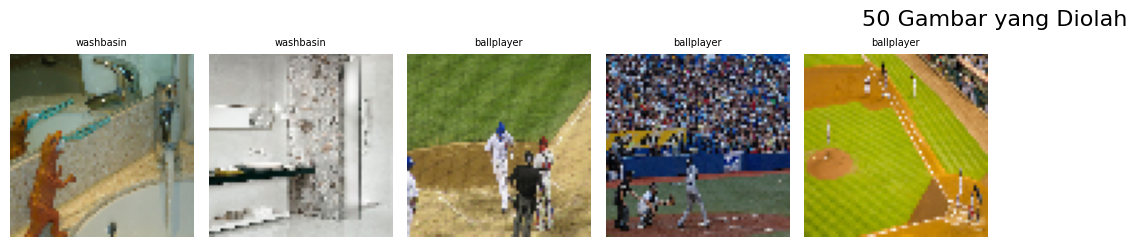


[Decision Tree Classification Report]

              precision    recall  f1-score   support

  ballplayer       0.50      1.00      0.67         1
   washbasin       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Akurasi DT: 0.5

[KNN Classification Report]

              precision    recall  f1-score   support

  ballplayer       0.50      1.00      0.67         1
   washbasin       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Akurasi KNN: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

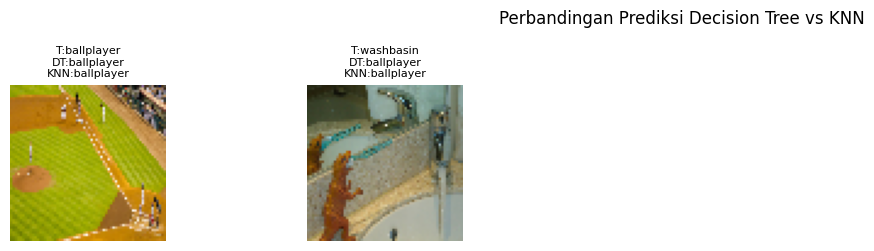

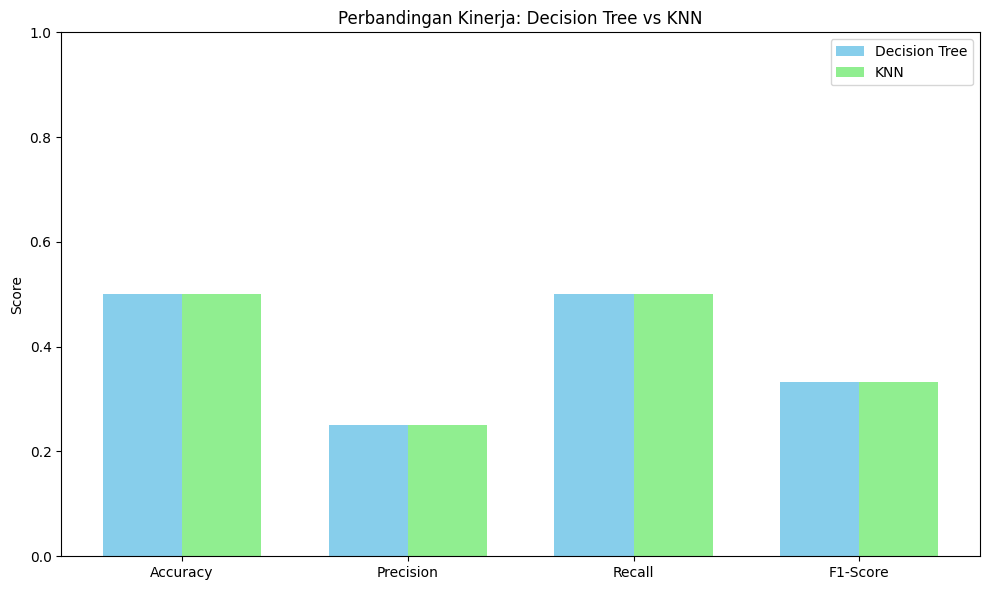

📌 Hasil Decision Tree dan KNN hampir identik.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# --- Load MobileNetV2 ---
mobilenet = MobileNetV2(weights='imagenet')

# --- Auto-label dan ekstraksi fitur ---
def auto_label_images(folder_path, max_images=50):
    X, y, images = [], [], []
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))][:max_images]

    for file in image_files:
        img_path = os.path.join(folder_path, file)

        try:
            # Label otomatis
            img_label = image.load_img(img_path, target_size=(224, 224))
            arr_label = img_to_array(img_label)
            arr_label = np.expand_dims(arr_label, axis=0)
            arr_label = preprocess_input(arr_label)
            pred = mobilenet.predict(arr_label, verbose=0)
            label = decode_predictions(pred, top=1)[0][0][1]

            # Resize dan grayscale
            img_cv = cv2.imread(img_path)
            if img_cv is None:
                continue
            img_resized = cv2.resize(img_cv, (64, 64))
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)
            images.append(img_resized)
        except:
            continue

    return np.array(X), np.array(y), images

# --- Load dan filter data ---
folder = "/content/val2014_sample"  # Ganti dengan folder gambar lokal
X, y, original_images = auto_label_images(folder, max_images=50)
label_counts = Counter(y)
valid_idx = [i for i, lbl in enumerate(y) if label_counts[lbl] >= 2]
X = X[valid_idx]
y = y[valid_idx]
original_images = [original_images[i] for i in valid_idx]

# --- Encode label ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Visualisasi gambar ---
def show_all_images(images, labels, le, title="50 Gambar yang Diolah"):
    plt.figure(figsize=(20, 12))
    for i in range(min(len(images), 50)):
        plt.subplot(5, 10, i + 1)
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(le.inverse_transform([labels[i]])[0], fontsize=7)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

show_all_images(original_images, y_encoded, le)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y_encoded, original_images, test_size=0.3, random_state=42, stratify=y_encoded
)

# --- Decision Tree ---
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# --- Evaluasi dan Report ---
print("\n[Decision Tree Classification Report]\n")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("Akurasi DT:", accuracy_score(y_test, y_pred_dt))

print("\n[KNN Classification Report]\n")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))

# --- Perbandingan visual hasil prediksi ---
def show_comparison(images, y_true, y_pred1, y_pred2, le, title):
    n = min(15, len(images))
    plt.figure(figsize=(15, 6))
    for i in range(n):
        plt.subplot(3, 5, i + 1)
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        true_label = le.inverse_transform([y_true[i]])[0]
        pred1_label = le.inverse_transform([y_pred1[i]])[0]
        pred2_label = le.inverse_transform([y_pred2[i]])[0]
        plt.title(f"T:{true_label}\nDT:{pred1_label}\nKNN:{pred2_label}", fontsize=8)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_comparison(img_test, y_test, y_pred_dt, y_pred_knn, le, "Perbandingan Prediksi Decision Tree vs KNN")

# --- Evaluasi metrik ---
def calculate_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, average="macro", zero_division=0),
    }

dt_metrics = calculate_metrics(y_test, y_pred_dt)
knn_metrics = calculate_metrics(y_test, y_pred_knn)

# --- Visualisasi metrik ---
metrics_names = list(dt_metrics.keys())
dt_values = list(dt_metrics.values())
knn_values = list(knn_metrics.values())

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, dt_values, width, label="Decision Tree", color="skyblue")
plt.bar(x + width / 2, knn_values, width, label="KNN", color="lightgreen")
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Perbandingan Kinerja: Decision Tree vs KNN")
plt.legend()
plt.tight_layout()
plt.show()

# --- Analisis hasil ---
if abs(dt_metrics['Accuracy'] - knn_metrics['Accuracy']) < 0.01:
    print("📌 Hasil Decision Tree dan KNN hampir identik.")
elif dt_metrics['Accuracy'] > knn_metrics['Accuracy']:
    print("📌 Decision Tree memiliki akurasi lebih baik.")
else:
    print("📌 KNN memiliki akurasi lebih baik.")


### **Topik Deep Learning**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 784ms/step - accuracy: 0.0000e+00 - loss: 3.8683 - val_accuracy: 0.0667 - val_loss: 4.0324
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.0589 - loss: 3.7366 - val_accuracy: 0.0667 - val_loss: 4.0561
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.0589 - loss: 3.6162 - val_accuracy: 0.0667 - val_loss: 4.0521
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.0589 - loss: 3.5401 - val_accuracy: 0.0667 - val_loss: 4.1951
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.1560 - loss: 3.4503 - val_accuracy: 0.0667 - val_loss: 4.5117
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.0000e+00 - loss: 4.1838 - val_accuracy: 0.0000e+00 - val_loss: 4.3858
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.0000e+00 - loss: 5.0181 - val_accuracy: 0.0667 - val_loss: 4.3475
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.0295 - loss: 4.9145 - val_accuracy: 0.0667 - v

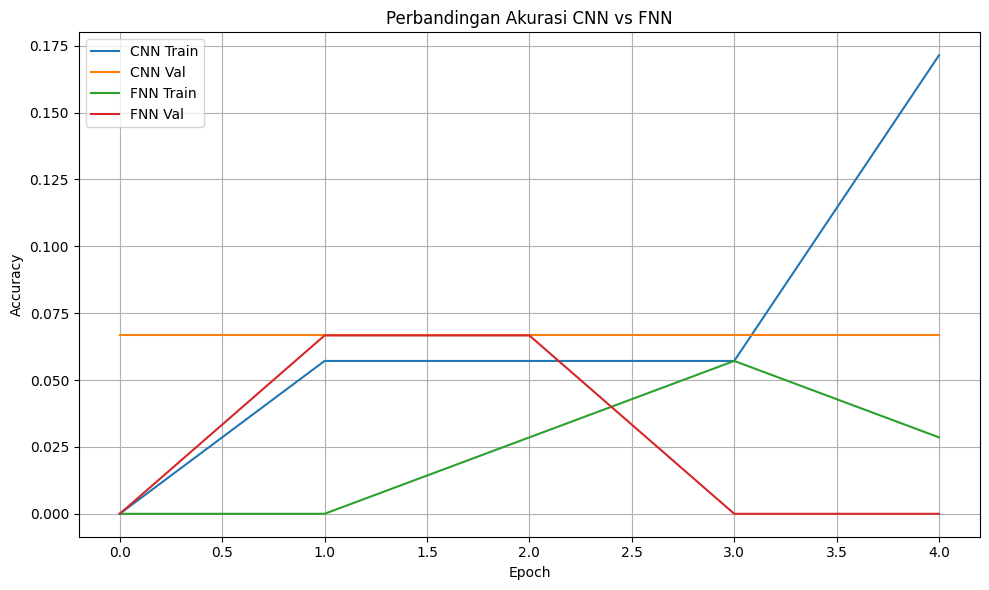

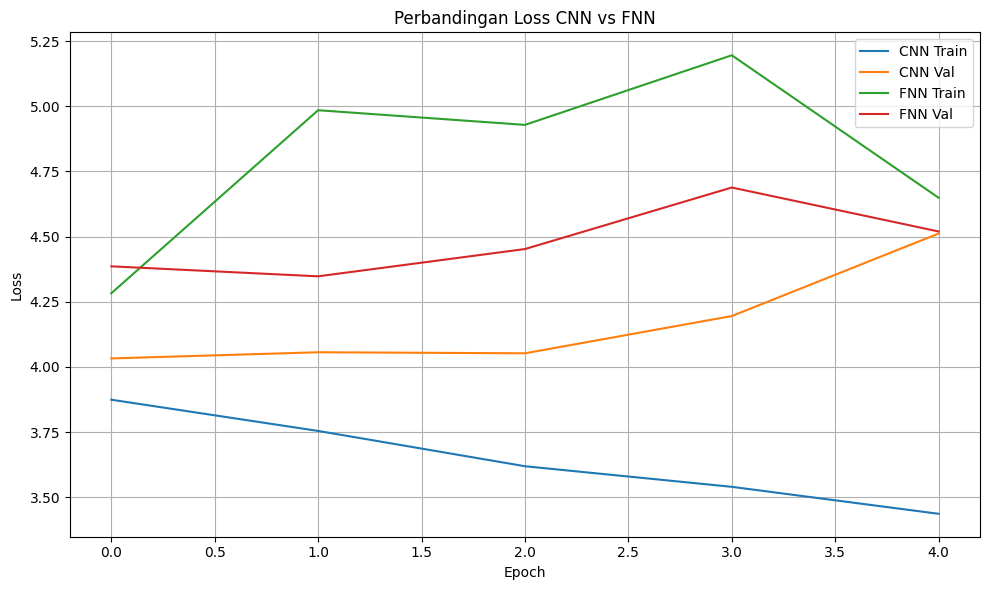

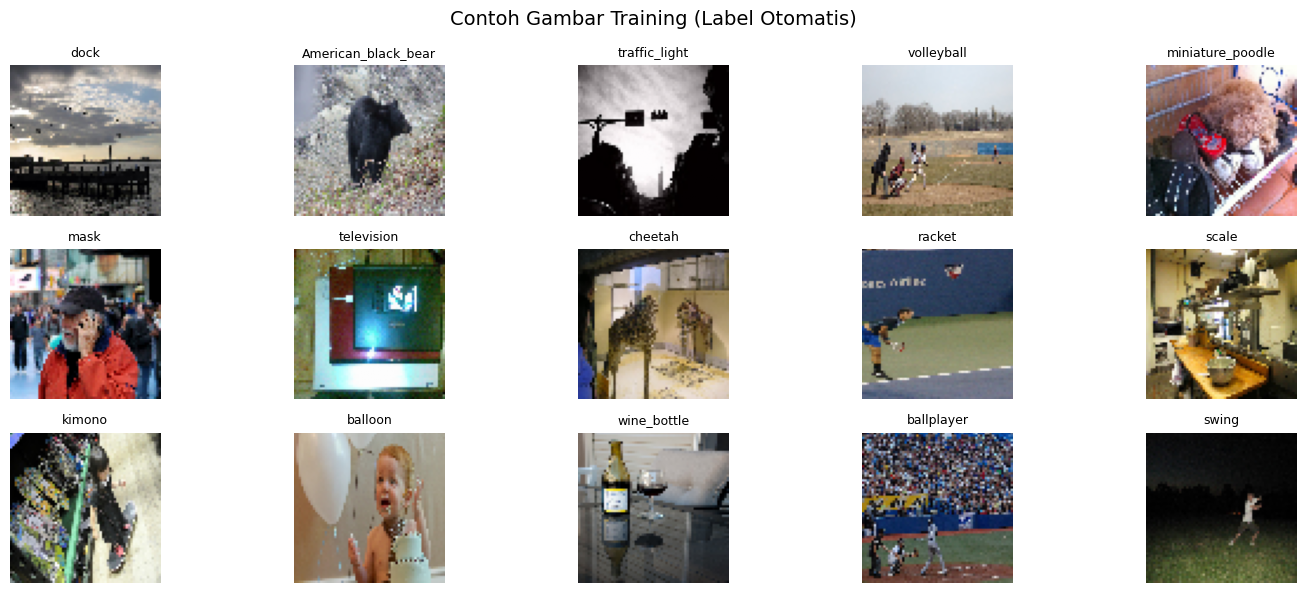

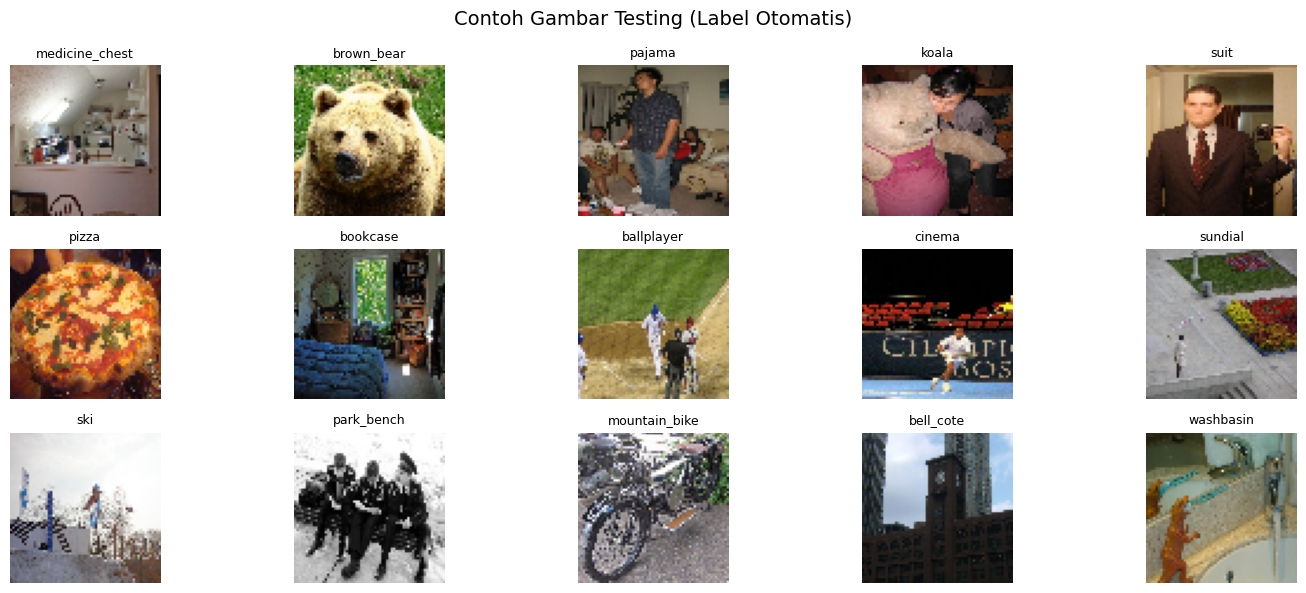

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


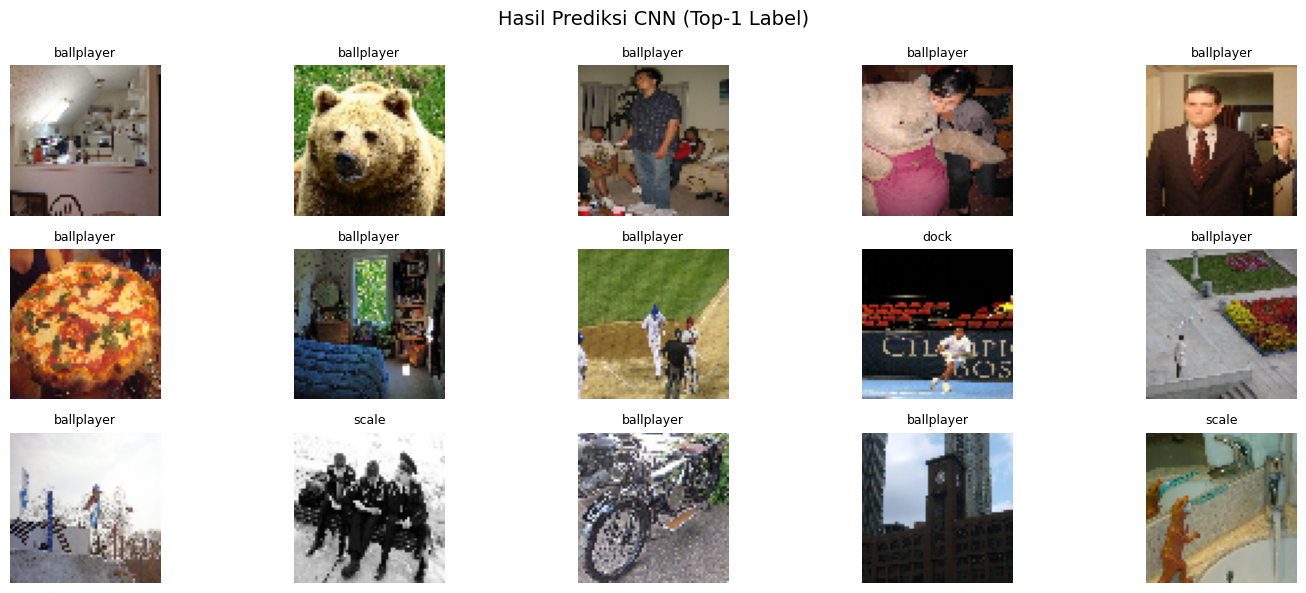

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


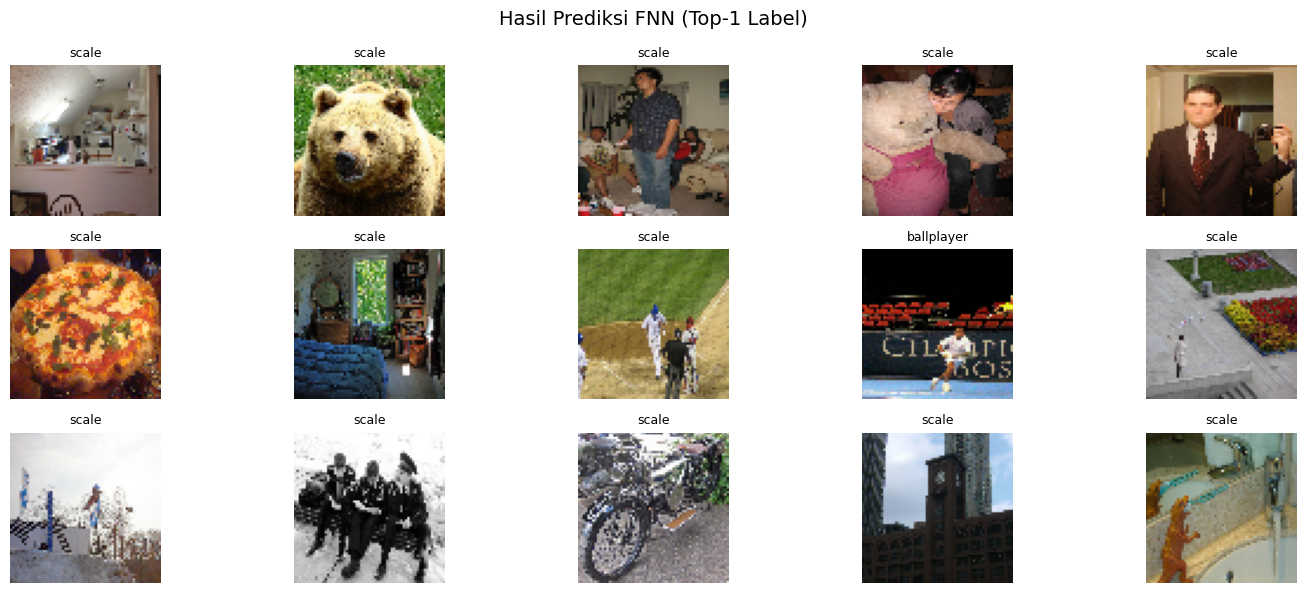

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

# --- Auto-label dengan MobileNetV2 ---
mobilenet = MobileNetV2(weights="imagenet")

def load_dl_data(folder_path, max_images=50):
    X, y = [], []
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(folder_path, file_name)

            # Label otomatis
            img_label = image.load_img(img_path, target_size=(224, 224))
            arr_label = image.img_to_array(img_label)
            arr_label = np.expand_dims(arr_label, axis=0)
            arr_label = preprocess_input(arr_label)
            pred = mobilenet.predict(arr_label, verbose=0)
            label = decode_predictions(pred, top=1)[0][0][1]

            # Resize dan normalisasi untuk CNN/FNN
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img / 255.0)
            y.append(label)

            if len(X) >= max_images:
                break
    return np.array(X), np.array(y)

# --- Load data ---
folder = "/content/val2014_sample"  # Ganti path jika perlu
X_dl, y_dl = load_dl_data(folder, max_images=50)

# --- Label Encoding ---
le = LabelEncoder()
y_encoded = le.fit_transform(y_dl)
y_cat = to_categorical(y_encoded)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_dl, y_cat, test_size=0.3, random_state=42)

# --- CNN Model ---
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# --- FNN Model ---
fnn = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
fnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train Models ---
history_cnn = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
history_fnn = fnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

# --- Plot Training History ---
def plot_history(histories, metric, title):
    plt.figure(figsize=(10, 6))
    for name, hist in histories:
        plt.plot(hist.history[metric], label=f'{name} Train')
        plt.plot(hist.history[f'val_{metric}'], label=f'{name} Val')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_history([("CNN", history_cnn), ("FNN", history_fnn)], "accuracy", "Perbandingan Akurasi CNN vs FNN")
plot_history([("CNN", history_cnn), ("FNN", history_fnn)], "loss", "Perbandingan Loss CNN vs FNN")

# --- Visualisasi Gambar dan Label Otomatis ---
def show_labeled_images(X_data, y_labels, le, title="Contoh Gambar & Label Otomatis", n=15):
    plt.figure(figsize=(15, 6))
    for i in range(min(n, len(X_data))):
        plt.subplot(3, 5, i + 1)
        plt.imshow(X_data[i])
        label = le.inverse_transform([np.argmax(y_labels[i])])[0]
        plt.title(label, fontsize=9)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# --- Visualisasi data training dan testing ---
show_labeled_images(X_train, y_train, le, title="Contoh Gambar Training (Label Otomatis)")
show_labeled_images(X_test, y_test, le, title="Contoh Gambar Testing (Label Otomatis)")

# --- Prediksi & Visualisasi Hasil CNN ---
y_pred_cnn = cnn.predict(X_test)
show_labeled_images(X_test, y_pred_cnn, le, title="Hasil Prediksi CNN (Top-1 Label)")

# --- Prediksi & Visualisasi Hasil FNN ---
y_pred_fnn = fnn.predict(X_test)
show_labeled_images(X_test, y_pred_fnn, le, title="Hasil Prediksi FNN (Top-1 Label)")


### **Topik Recognition (Image Classification dan Object Detection)**

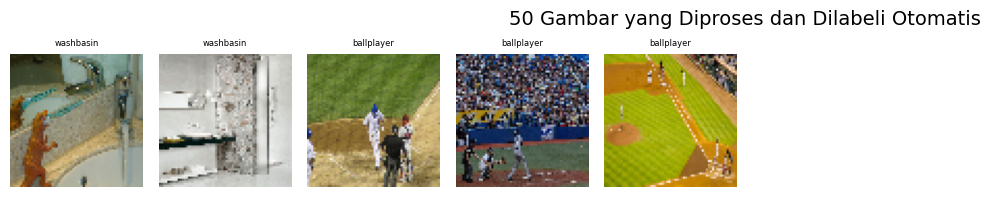


=== Melatih Model HOG + SVM ===

=== Melatih Model CNN ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.6841 - val_accuracy: 0.5000 - val_loss: 0.7305
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.6667 - loss: 0.6730 - val_accuracy: 0.5000 - val_loss: 0.7457
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6667 - loss: 0.6259 - val_accuracy: 0.5000 - val_loss: 0.7195
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6667 - loss: 0.7222 - val_accuracy: 0.5000 - val_loss: 0.7102
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6667 - loss: 0.5209 - val_accuracy: 0.5000 - val_loss: 0.7180
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6667 - loss: 0.6465 - val_accuracy: 0.5000 - val_loss: 0.7067
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.6667 - loss: 0.8669 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.3333 - loss: 0.7207 - val_accuracy: 0.5000 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

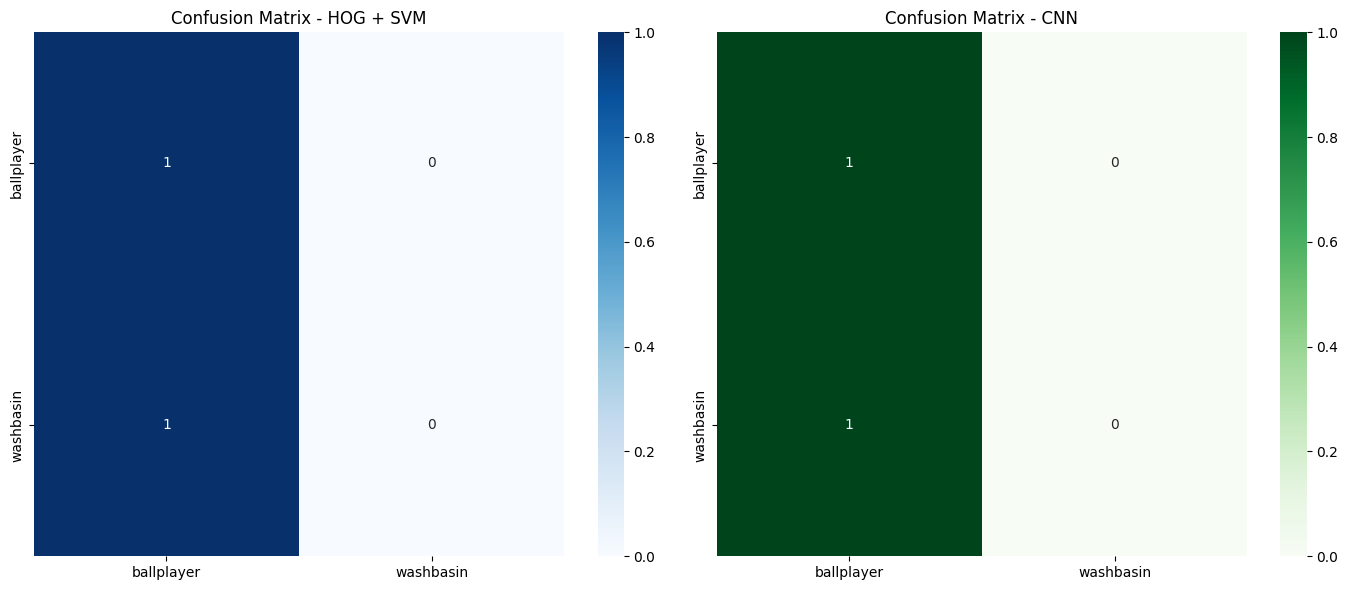

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

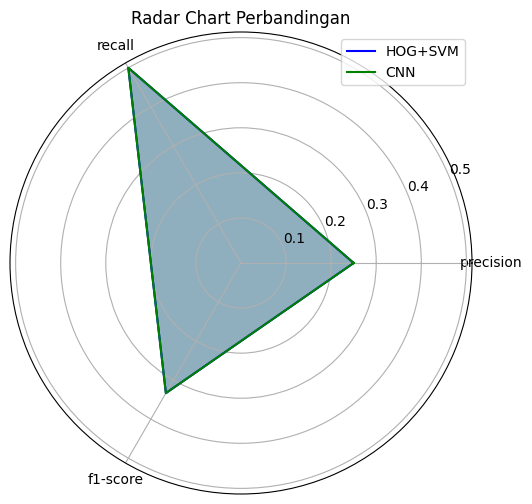

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from math import pi

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# === Auto Labeling ===
mobilenet = MobileNetV2(weights='imagenet')

def auto_label_images(folder_path, max_images=50):
    X, y, img_list = [], [], []
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))][:max_images]

    for file_name in image_files:
        img_path = os.path.join(folder_path, file_name)

        # Labeling dengan MobileNetV2
        img_mob = image.load_img(img_path, target_size=(224, 224))
        arr = image.img_to_array(img_mob)
        arr = np.expand_dims(arr, axis=0)
        arr = preprocess_input(arr)
        preds = mobilenet.predict(arr, verbose=0)
        label = decode_predictions(preds, top=1)[0][0][1]

        # Preprocessing untuk training
        img_cv = cv2.imread(img_path)
        if img_cv is None:
            continue
        img_resized = cv2.resize(img_cv, (64, 64))
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        X.append(img_gray)
        y.append(label)
        img_list.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    return np.array(X), np.array(y), img_list

# === Load Data ===
folder = "/content/val2014_sample"  # Ganti dengan path folder kamu
X, y, img_rgb = auto_label_images(folder, max_images=50)

# === Filter hanya label yang muncul >= 2x ===
label_counts = Counter(y)
valid_idx = [i for i, lbl in enumerate(y) if label_counts[lbl] >= 2]
X, y = X[valid_idx], y[valid_idx]
img_rgb = [img_rgb[i] for i in valid_idx]

# === Cek jumlah kelas ===
if len(set(y)) < 2:
    raise ValueError("❌ Tidak cukup kelas untuk training. Coba ganti folder atau tambah jumlah gambar.")

# === Encode Label ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Split Train/Test ===
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y_encoded, img_rgb, test_size=0.3, random_state=42, stratify=y_encoded
)

# === Visualisasi 50 Gambar ===
plt.figure(figsize=(15, 8))
for i in range(min(50, len(img_rgb))):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img_rgb[i])
    plt.title(y[i], fontsize=6)
    plt.axis("off")
plt.suptitle("50 Gambar yang Diproses dan Dilabeli Otomatis", fontsize=14)
plt.tight_layout()
plt.show()

# === Ekstraksi Fitur HOG ===
def extract_hog_features(images):
    return np.array([hog(img, orientations=12, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=False, block_norm='L2-Hys') for img in images])

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# === HOG + SVM ===
print("\n=== Melatih Model HOG + SVM ===")
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_hog, y_train)
y_pred_svm = svm.predict(X_test_hog)

# === CNN ===
print("\n=== Melatih Model CNN ===")
X_train_cnn = X_train.reshape(-1, 64, 64, 1).astype("float32") / 255.0
X_test_cnn = X_test.reshape(-1, 64, 64, 1).astype("float32") / 255.0
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(le.classes_), activation='softmax')
])
cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=8, validation_data=(X_test_cnn, y_test_cnn), verbose=1)

y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)

# === Evaluasi Model ===
print("\n[Classification Report - HOG + SVM]\n")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

print("\n[Classification Report - CNN]\n")
print(classification_report(y_test, y_pred_cnn, target_names=le.classes_))

# === Confusion Matrix ===
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix - HOG + SVM")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title("Confusion Matrix - CNN")
plt.tight_layout()
plt.show()

# === Radar Chart Perbandingan ===
svm_report = classification_report(y_test, y_pred_svm, output_dict=True, target_names=le.classes_)
cnn_report = classification_report(y_test, y_pred_cnn, output_dict=True, target_names=le.classes_)

metrics = ['precision', 'recall', 'f1-score']
svm_scores = [svm_report['weighted avg'][m] for m in metrics]
cnn_scores = [cnn_report['weighted avg'][m] for m in metrics]

# Radar format
labels = np.array(metrics)
svm_scores += [svm_scores[0]]
cnn_scores += [cnn_scores[0]]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += [angles[0]]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, svm_scores, label='HOG+SVM', color='blue')
ax.fill(angles, svm_scores, alpha=0.25, color='blue')
ax.plot(angles, cnn_scores, label='CNN', color='green')
ax.fill(angles, cnn_scores, alpha=0.25, color='green')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart Perbandingan")
plt.legend()
plt.show()
